# 数据分析查看器

根据config的backtest_name读取相关文件并显示内容


In [2]:
import pandas as pd
import pickle
from pathlib import Path
import config
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')


In [3]:
# 获取配置信息
backtest_name = config.backtest_name
runtime_data_path = Path(config.runtime_data_path)
print(f"回测名称: {backtest_name}")
print(f"数据路径: {runtime_data_path}")


回测名称: 测试
数据路径: D:\python大作业\data


## 1. 读取运行缓存中的任务一相关文件


运行缓存路径: D:\python大作业\data\运行缓存\测试
找到的任务一pkl文件: ['任务一df.pkl']
找到的任务一可视化图片: ['任务一df可视化.png']
找到的因子统计信息文件: ['因子统计信息.csv']

=== 任务一pkl文件 1: 任务一df.pkl ===
数据形状: (202611, 13)
列名: ['交易日期', '股票代码', '股票名称', '开盘价', '最高价', '最低价', '收盘价', '总市值', 'MACD', 'RSI', 'VWMA', '情绪因子', '沪深300成分_1']

前10行数据:


,交易日期,股票代码,股票名称,开盘价,最高价,最低价,收盘价,总市值,MACD,RSI,VWMA,情绪因子,沪深300成分_1
0,2023-01-03,sh600000,浦发银行,7.27,7.28,7.17,7.23,2.1222e+11,1,0,0,-0.2500,1
1,2023-01-03,sh600004,白云机场,14.99,15.00,14.31,14.56,3.4459e+10,1,1,0,-0.4286,0
2,2023-01-03,sh600006,东风汽车,5.58,5.66,5.52,5.66,1.1320e+10,1,1,0,0.4545,0
3,2023-01-03,sh600007,中国国贸,15.75,16.27,15.71,16.13,1.6247e+10,1,0,0,-0.3333,0
4,2023-01-03,sh600008,首创环保,2.84,2.90,2.82,2.88,2.1141e+10,1,0,0,0.5000,0
5,2023-01-03,sh600009,上海机场,57.56,57.56,56.05,56.25,1.3998e+11,1,0,0,-0.1852,1
6,2023-01-03,sh600010,包钢股份,1.92,1.95,1.91,1.93,8.7979e+10,1,0,0,-0.1892,1
7,2023-01-03,sh600011,华能国际,7.70,7.98,7.53,7.91,1.2417e+11,1,0,1,0.2353,1
8,2023-01-03,sh600012,皖通高速,7.30,7.38,7.29,7.33,1.2158e+10,1,0,0,0.0000,0
9,2023-01-03,sh600015,华夏银行,5.20,5.21,5.15,5.21,8.2917e+10,1,0,0,1.0000,1



=== 任务一可视化图片 1: 任务一df可视化.png ===


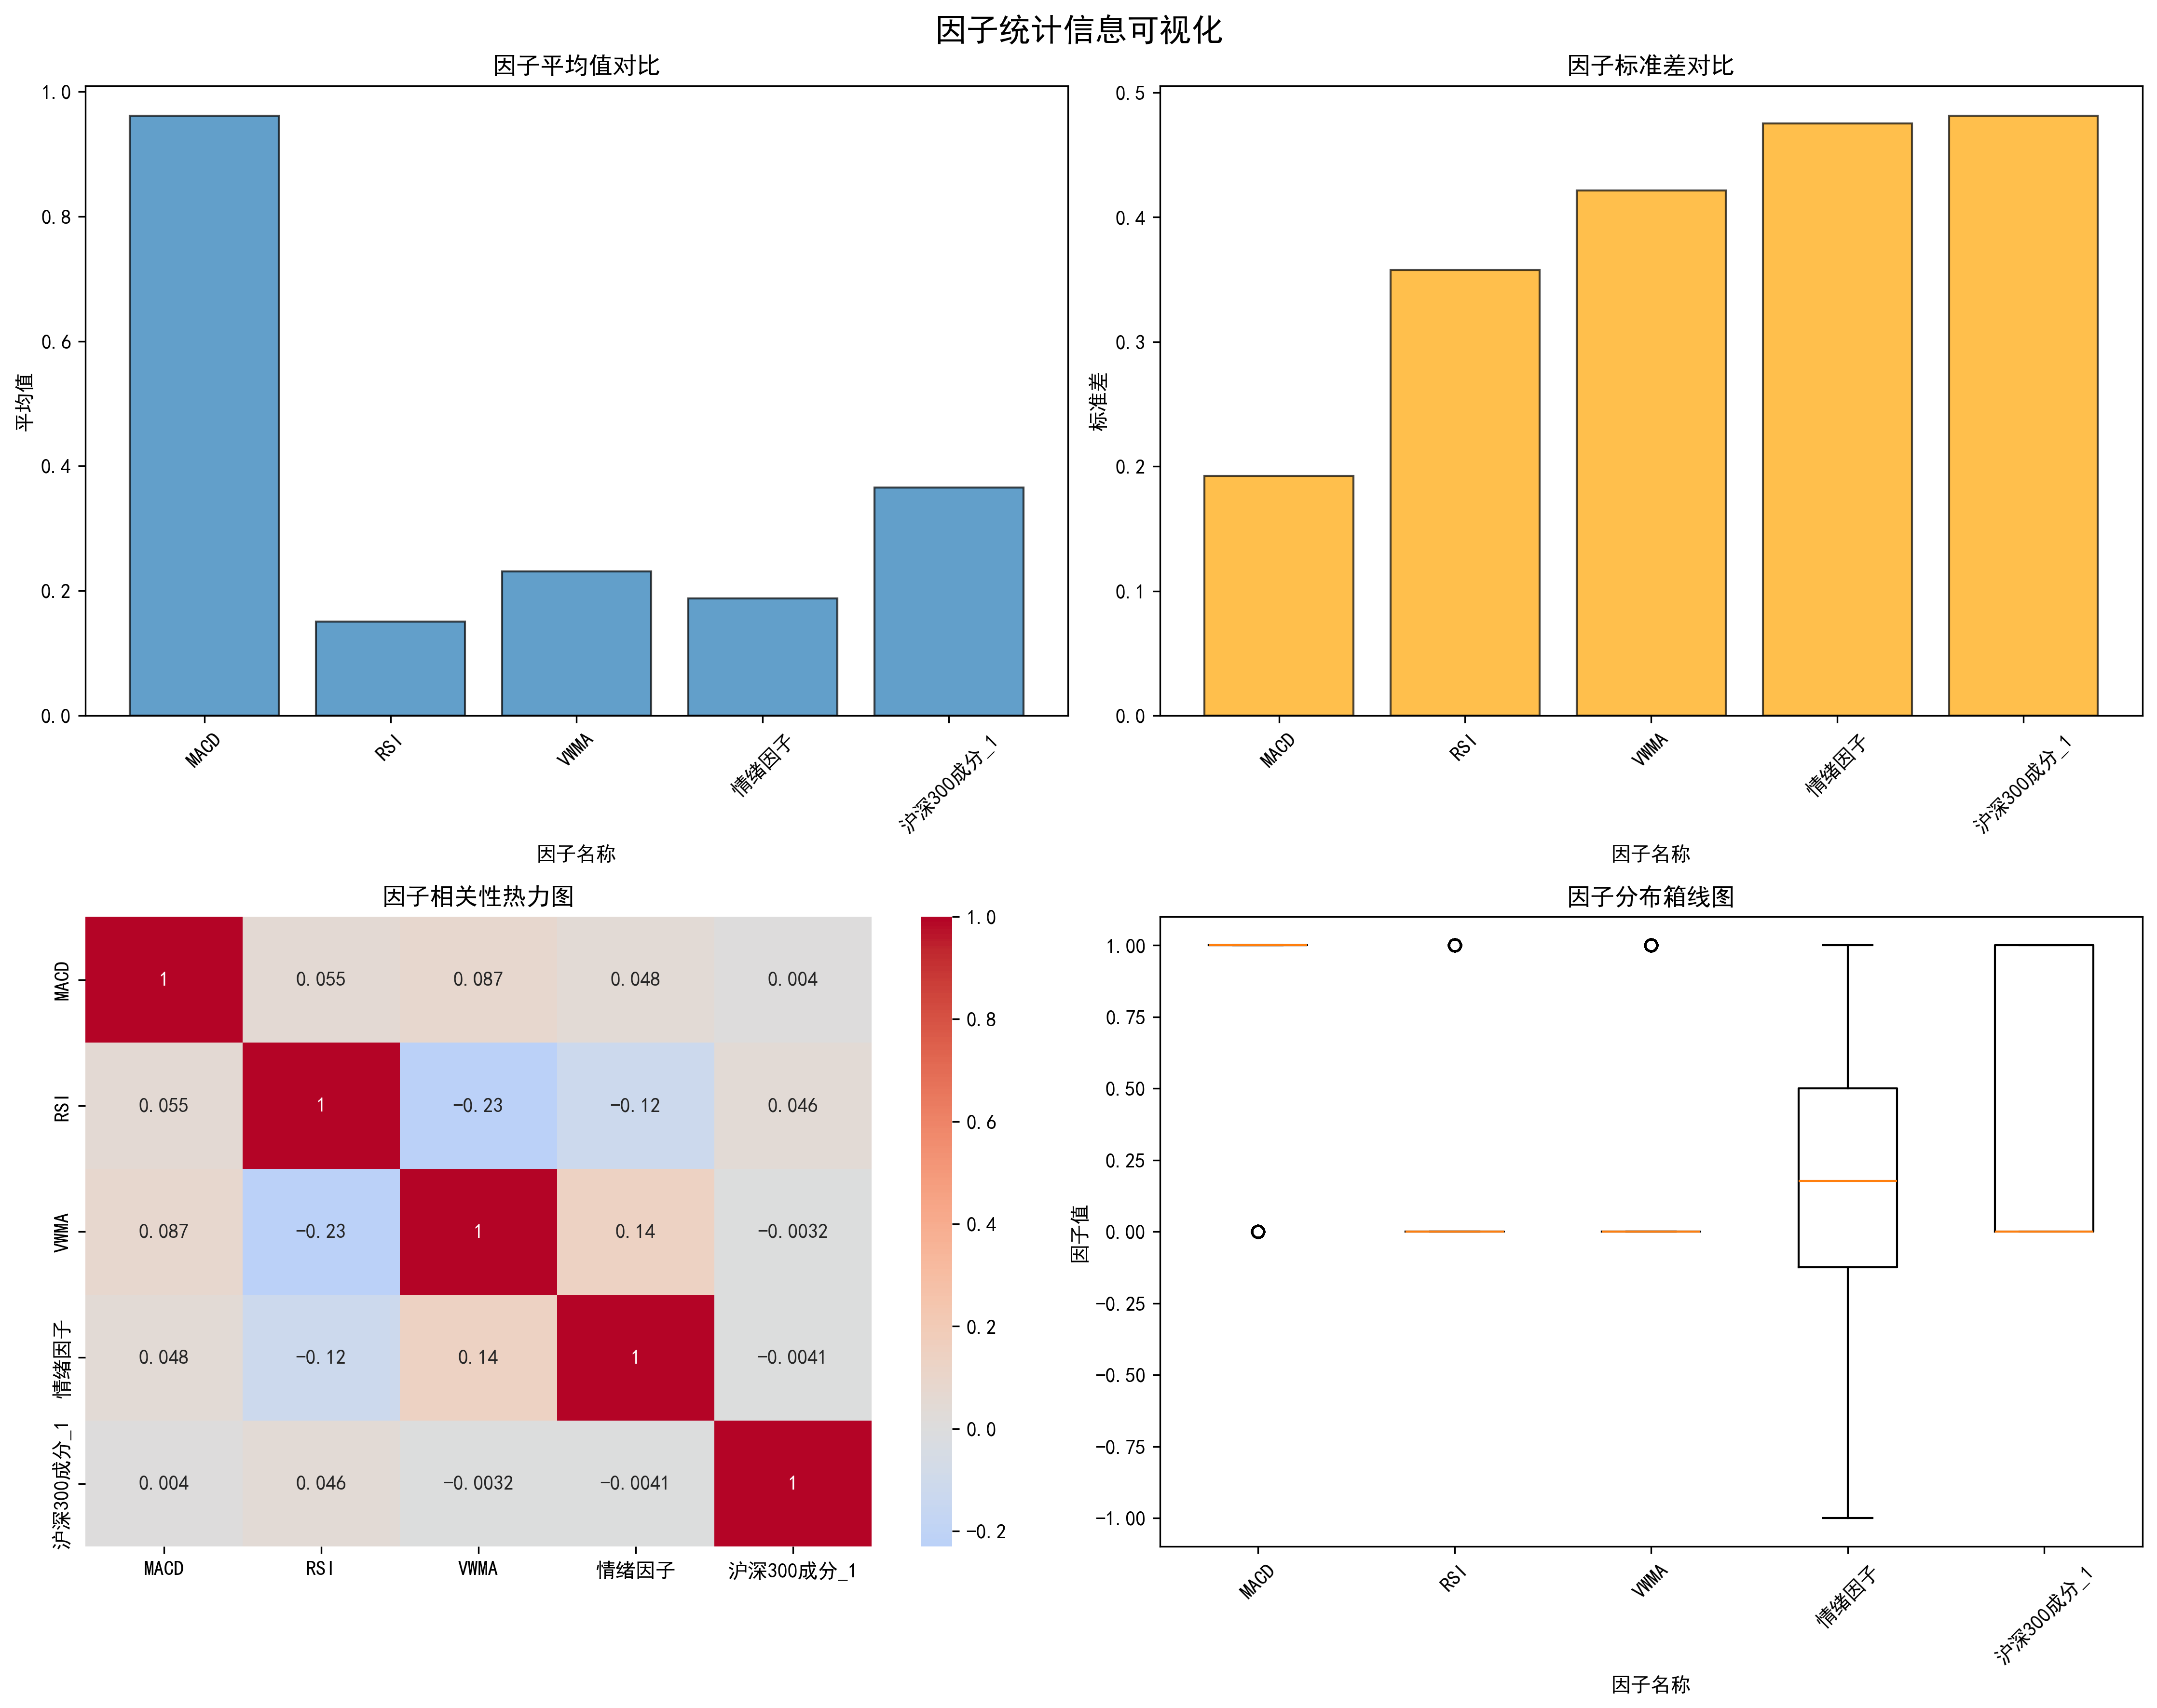


=== 因子统计信息文件 1: 因子统计信息.csv ===
数据形状: (5, 8)

前10行数据:


,计数,平均值,标准差,最小值,20%分位数,50%分位数,75%分位数,最大值
MACD,202611.0,0.9615,0.1923,0.0,1.0,1.0000,1.0,1.0
RSI,202611.0,0.1506,0.3576,0.0,0.0,0.0000,0.0,1.0
VWMA,202611.0,0.2310,0.4215,0.0,0.0,0.0000,0.0,1.0
情绪因子,116405.0,0.1878,0.4752,-1.0,-0.2,0.1765,0.5,1.0
沪深300成分_1,202611.0,0.3653,0.4815,0.0,0.0,0.0000,1.0,1.0


In [4]:
# 运行缓存路径
runtime_cache_path = runtime_data_path / "运行缓存"/backtest_name
print(f"运行缓存路径: {runtime_cache_path}")

# 查找任务一相关文件
task1_pkl_files = list(runtime_cache_path.glob("*任务一df.pkl"))
task1_png_files = list(runtime_cache_path.glob("*任务一df可视化.png"))
factor_stats_files = list(runtime_cache_path.glob("*因子统计信息.csv"))

print(f"找到的任务一pkl文件: {[f.name for f in task1_pkl_files]}")
print(f"找到的任务一可视化图片: {[f.name for f in task1_png_files]}")
print(f"找到的因子统计信息文件: {[f.name for f in factor_stats_files]}")

# 读取任务一pkl文件
if not task1_pkl_files:
    print("未找到任务一pkl文件！")
else:
    for i, file_path in enumerate(task1_pkl_files, 1):
        print(f"\n=== 任务一pkl文件 {i}: {file_path.name} ===")
        try:
            # 读取pkl文件
            df = pd.read_pickle(file_path)
            print(f"数据形状: {df.shape}")
            print(f"列名: {list(df.columns)}")
            
            # 只显示前10行数据，使用小字体
            print("\n前10行数据:")
            df_head = df.head(10)
            
            # 设置pandas显示选项，使用小字体和紧凑布局
            with pd.option_context('display.max_columns', None, 
                                 'display.width', None, 
                                 'display.max_colwidth', 20,
                                 'display.precision', 4):
                # 使用HTML样式来设置小字体
                from IPython.display import HTML
                html = df_head.to_html(classes='table table-sm', table_id='dataframe')
                html = html.replace('<table', '<table style="font-size: 10px; font-family: monospace;"')
                display(HTML(html))
        except Exception as e:
            print(f"读取文件失败: {e}")

# 显示任务一可视化图片
if not task1_png_files:
    print("未找到任务一可视化图片！")
else:
    for i, file_path in enumerate(task1_png_files, 1):
        print(f"\n=== 任务一可视化图片 {i}: {file_path.name} ===")
        try:
            from IPython.display import Image
            display(Image(str(file_path)))
        except Exception as e:
            print(f"显示图片失败: {e}")

# 读取因子统计信息文件
if not factor_stats_files:
    print("未找到因子统计信息文件！")
else:
    for i, file_path in enumerate(factor_stats_files, 1):
        print(f"\n=== 因子统计信息文件 {i}: {file_path.name} ===")
        try:
            # 读取CSV文件
            df = pd.read_csv(file_path, index_col=0, encoding='utf-8-sig')
            print(f"数据形状: {df.shape}")
            
            # 只显示前10行数据，使用小字体
            print("\n前10行数据:")
            df_head = df.head(10)
            
            # 设置pandas显示选项，使用小字体和紧凑布局
            with pd.option_context('display.max_columns', None, 
                                 'display.width', None, 
                                 'display.max_colwidth', 20,
                                 'display.precision', 4):
                # 使用HTML样式来设置小字体
                from IPython.display import HTML
                html = df_head.to_html(classes='table table-sm', table_id='dataframe')
                html = html.replace('<table', '<table style="font-size: 10px; font-family: monospace;"')
                display(HTML(html))
        except Exception as e:
            print(f"读取文件失败: {e}")


## 2. 读取任务二情绪因子因子分析HTML文件（任务三-2）


In [6]:
# 单因子分析路径
single_factor_path = runtime_data_path / "分析结果" / "单因子分析"
print(f"单因子分析路径: {single_factor_path}")

# 查找HTML文件
html_files = list(single_factor_path.glob("*.html"))
print(f"找到的HTML文件: {[f.name for f in html_files]}")

if not html_files:
    print("未找到单因子分析HTML文件！")
else:
    for i, file_path in enumerate(html_files, 1):
        print(f"\n=== 单因子分析HTML文件 {i}: {file_path.name} ===")
        try:
            # 获取文件信息
            file_size = file_path.stat().st_size
            print(f"文件大小: {file_size} 字节")
            print(f"文件路径: {file_path}")
            
            # 自动在默认浏览器中打开
            file_url = "file:///" + str(file_path).replace('\\', '/')
            print(f"\n文件路径: {file_path}")
            
            import webbrowser
            try:
                webbrowser.open(file_url)
                print("✅ 已在默认浏览器中打开文件")
            except Exception as e:
                print(f"⚠️ 无法自动打开浏览器: {e}")
                print("请手动复制文件路径到浏览器地址栏")
            
        except Exception as e:
            print(f"读取文件失败: {e}")


单因子分析路径: D:\python大作业\data\分析结果\单因子分析
找到的HTML文件: ['factor_情绪因子因子分析报告.html']

=== 单因子分析HTML文件 1: factor_情绪因子因子分析报告.html ===
文件大小: 46049723 字节
文件路径: D:\python大作业\data\分析结果\单因子分析\factor_情绪因子因子分析报告.html

文件路径: D:\python大作业\data\分析结果\单因子分析\factor_情绪因子因子分析报告.html
✅ 已在默认浏览器中打开文件


## 4. 读取任务一择时因子因子分析HTML文件


In [7]:
# 择时因子分析路径
timing_factor_path = runtime_data_path / "分析结果" / "择时因子分析"
print(f"择时因子分析路径: {timing_factor_path}")

# 查找HTML文件
timing_html_files = list(timing_factor_path.glob("*.html"))
print(f"找到的择时因子分析HTML文件: {[f.name for f in timing_html_files]}")

if not timing_html_files:
    print("未找到择时因子分析HTML文件！")
else:
    for i, file_path in enumerate(timing_html_files, 1):
        print(f"\n=== 择时因子分析HTML文件 {i}: {file_path.name} ===")
        try:
            # 获取文件信息
            file_size = file_path.stat().st_size
            print(f"文件大小: {file_size} 字节")
            print(f"文件路径: {file_path}")
            
            # 自动在默认浏览器中打开
            file_url = "file:///" + str(file_path).replace('\\', '/')
            print(f"\n文件路径: {file_path}")
            
            import webbrowser
            try:
                webbrowser.open(file_url)
                print("✅ 已在默认浏览器中打开文件")
            except Exception as e:
                print(f"⚠️ 无法自动打开浏览器: {e}")
                print("请手动复制文件路径到浏览器地址栏")
            
        except Exception as e:
            print(f"读取文件失败: {e}")


择时因子分析路径: D:\python大作业\data\分析结果\择时因子分析
找到的择时因子分析HTML文件: ['factor_Ma_(5,20)择时因子分析报告.html']

=== 择时因子分析HTML文件 1: factor_Ma_(5,20)择时因子分析报告.html ===
文件大小: 63956120 字节
文件路径: D:\python大作业\data\分析结果\择时因子分析\factor_Ma_(5,20)择时因子分析报告.html

文件路径: D:\python大作业\data\分析结果\择时因子分析\factor_Ma_(5,20)择时因子分析报告.html
✅ 已在默认浏览器中打开文件



## 4. 读取择时因子分析中的任意一个股票CSV文件

In [5]:
# 择时因子分析CSV文件路径
timing_csv_path = runtime_data_path / "分析结果" / "择时因子分析"
print(f"择时因子分析CSV路径: {timing_csv_path}")

# 查找择时因子子文件夹
timing_factor_dirs = [d for d in timing_csv_path.iterdir() if d.is_dir()]
print(f"找到的择时因子子文件夹: {[d.name for d in timing_factor_dirs]}")

if not timing_factor_dirs:
    print("未找到择时因子子文件夹！")
else:
    # 选择第一个择时因子文件夹
    selected_factor_dir = timing_factor_dirs[0]
    print(f"\n=== 选择的择时因子文件夹: {selected_factor_dir.name} ===")
    
    # 查找该文件夹中的CSV文件
    csv_files = list(selected_factor_dir.glob("*.csv"))
    print(f"找到的CSV文件数量: {len(csv_files)}")
    print(f"前10个CSV文件: {[f.name for f in csv_files[:10]]}")
    
    if not csv_files:
        print("未找到择时因子分析CSV文件！")
    else:
        # 选择第一个CSV文件进行显示
        selected_file = csv_files[0]
        print(f"\n=== 选择的CSV文件: {selected_file.name} ===")
        try:
            # 读取CSV文件
            df = pd.read_csv(selected_file, encoding='utf-8-sig')
            print(f"数据形状: {df.shape}")
            print(f"列名: {list(df.columns)}")
            
            # 只显示前10行数据，使用小字体
            print("\n前10行数据:")
            df_head = df.head(10)
            
            # 设置pandas显示选项，使用小字体和紧凑布局
            with pd.option_context('display.max_columns', None, 
                                 'display.width', None, 
                                 'display.max_colwidth', 20,
                                 'display.precision', 4):
                # 使用HTML样式来设置小字体
                from IPython.display import HTML
                html = df_head.to_html(classes='table table-sm', table_id='dataframe')
                html = html.replace('<table', '<table style="font-size: 10px; font-family: monospace;"')
                display(HTML(html))
            
            # 显示数据统计信息（前10行的统计）
            print("\n前10行数据统计信息:")
            with pd.option_context('display.max_columns', None, 
                                 'display.width', None, 
                                 'display.max_colwidth', 15,
                                 'display.precision', 4):
                html = df_head.describe().to_html(classes='table table-sm', table_id='stats')
                html = html.replace('<table', '<table style="font-size: 10px; font-family: monospace;"')
                display(HTML(html))
            
            # 显示数据类型
            print("\n数据类型:")
            dtypes_df = pd.DataFrame({'列名': df.columns, '数据类型': df.dtypes})
            with pd.option_context('display.max_columns', None, 
                                 'display.width', None, 
                                 'display.max_colwidth', 20):
                html = dtypes_df.to_html(classes='table table-sm', table_id='dtypes', index=False)
                html = html.replace('<table', '<table style="font-size: 10px; font-family: monospace;"')
                display(HTML(html))
            
        except Exception as e:
            print(f"读取文件失败: {e}")


择时因子分析CSV路径: D:\python大作业\data\分析结果\择时因子分析
找到的择时因子子文件夹: ['factor_Ma_(5,20)']

=== 选择的择时因子文件夹: factor_Ma_(5,20) ===
找到的CSV文件数量: 822
前10个CSV文件: ['sh600000.csv', 'sh600004.csv', 'sh600006.csv', 'sh600007.csv', 'sh600008.csv', 'sh600009.csv', 'sh600010.csv', 'sh600011.csv', 'sh600012.csv', 'sh600015.csv']

=== 选择的CSV文件: sh600000.csv ===
数据形状: (49, 25)
列名: ['交易日期', '股票代码', '股票名称', '流通市值', '总市值', '新版申万一级行业名称', 'factor_Ma_(5,20)', '下周期涨跌幅', '下周期每天涨跌幅', '风格因子_估值', '风格因子_动量', '风格因子_反转', '风格因子_成长', '风格因子_杠杆', '风格因子_波动', '风格因子_盈利', '风格因子_规模', '当周期股票数', 'groups', '未来1日总收益率', '未来1日平均收益率', '未来5日总收益率', '未来5日平均收益率', '未来20日总收益率', '未来20日平均收益率']

前10行数据:


,交易日期,股票代码,股票名称,流通市值,总市值,新版申万一级行业名称,"factor_Ma_(5,20)",下周期涨跌幅,下周期每天涨跌幅,风格因子_估值,风格因子_动量,风格因子_反转,风格因子_成长,风格因子_杠杆,风格因子_波动,风格因子_盈利,风格因子_规模,当周期股票数,groups,未来1日总收益率,未来1日平均收益率,未来5日总收益率,未来5日平均收益率,未来20日总收益率,未来20日平均收益率
0,2023-01-04,sh600000,浦发银行,2.1456e+11,2.1456e+11,银行,1.0,-0.0095,"[0.00547195622435015, -0.0013605442176870541, 0.0, -0.008174386920980825, 0.0027472527472527375]",2164.0,463.0,603.0,1326.0,2318.0,81.0,1418.0,780.0,804,2.0,-0.0095,-0.0095,-0.0310,-0.0062,-0.0005,2.7014e-04
1,2023-01-11,sh600000,浦发银行,2.1427e+11,2.1427e+11,银行,1.0,-0.0027,"[-0.004109589041095929, 0.009628610729023324, -0.0013623978201634523, -0.004092769440654842, 0.00136986301369868]",2170.0,460.0,595.0,1326.0,2321.0,94.0,1418.0,781.0,802,2.0,-0.0027,-0.0027,-0.0177,-0.0035,0.0173,1.1504e-03
2,2023-01-18,sh600000,浦发银行,2.1456e+11,2.1456e+11,银行,1.0,0.0068,"[0.002735978112175186, 0.004092769440654953, 0.005434782608695565, -0.004054054054054124, -0.0013568521031207537]",2178.0,481.0,330.0,1326.0,2323.0,85.0,1418.0,780.0,803,2.0,0.0068,0.0068,-0.0136,-0.0027,-0.0058,1.6818e-05
3,2023-02-01,sh600000,浦发银行,2.1603e+11,2.1603e+11,银行,1.0,-0.0217,"[0.0, -0.0122282608695653, -0.0027510316368637433, -0.0013793103448275223, -0.0013812154696132284]",2185.0,475.0,228.0,1326.0,2330.0,43.0,1418.0,782.0,805,2.0,-0.0217,-0.0217,-0.0095,-0.0018,-0.0275,-1.0796e-03
4,2023-02-08,sh600000,浦发银行,2.1222e+11,2.1222e+11,银行,0.0,-0.0041,"[0.004149377593360981, -0.0027548209366390353, -0.0013812154696132284, 0.0013831258644536604, -0.0055248618784530246]",2189.0,463.0,190.0,1326.0,2333.0,33.0,1418.0,783.0,803,1.0,-0.0041,-0.0041,-0.0194,-0.0038,-0.0004,2.8185e-04
5,2023-02-15,sh600000,浦发银行,2.1134e+11,2.1134e+11,银行,0.0,0.0042,"[-0.001388888888888884, -0.00834492350486793, 0.018232819074333717, 0.004132231404958775, -0.006858710562414272]",2189.0,398.0,115.0,1326.0,2340.0,26.0,1418.0,783.0,807,1.0,0.0042,0.0042,-0.0014,-0.0001,0.0302,1.8069e-03
6,2023-02-22,sh600000,浦发银行,2.1251e+11,2.1251e+11,银行,0.0,0.0014,"[-0.0013812154696132284, -0.006915629322268413, -0.0027855153203342198, 0.0027932960893854997, 0.011142061281337101]",2195.0,396.0,198.0,1326.0,2342.0,41.0,1418.0,783.0,808,1.0,0.0014,0.0014,-0.0042,-0.0007,0.0259,1.5989e-03
7,2023-03-01,sh600000,浦发银行,2.1310e+11,2.1310e+11,银行,0.0,0.0111,"[0.0013774104683195176, 0.011004126547455195, -0.0027210884353741083, -0.0027285129604366354, 0.0]",2194.0,372.0,195.0,1331.0,2341.0,48.0,1417.0,783.0,809,1.0,0.0111,0.0111,-0.0055,-0.0010,0.0635,3.4313e-03
8,2023-03-08,sh600000,浦发银行,2.1456e+11,2.1456e+11,银行,1.0,-0.0315,"[-0.005471956224350261, -0.016506189821182793, -0.012587412587412694, -0.005665722379603388, 0.008547008547008517]",2192.0,353.0,432.0,1332.0,2340.0,36.0,1417.0,784.0,809,2.0,-0.0315,-0.0315,-0.0082,-0.0015,0.0849,4.4470e-03
9,2023-03-15,sh600000,浦发银行,2.0781e+11,2.0781e+11,银行,0.0,0.0141,"[0.005649717514124353, -0.001404494382022392, 0.002812939521800173, 0.0, 0.007012622720897532]",2198.0,325.0,405.0,1335.0,2347.0,45.0,1420.0,782.0,809,1.0,0.0141,0.0141,0.0803,0.0158,0.0950,4.9003e-03



前10行数据统计信息:


,流通市值,总市值,"factor_Ma_(5,20)",下周期涨跌幅,风格因子_估值,风格因子_动量,风格因子_反转,风格因子_成长,风格因子_杠杆,风格因子_波动,风格因子_盈利,风格因子_规模,当周期股票数,groups,未来1日总收益率,未来1日平均收益率,未来5日总收益率,未来5日平均收益率,未来20日总收益率,未来20日平均收益率
count,1.0000e+01,1.0000e+01,10.000,10.0000,10.0000,10.000,10.0000,10.0000,10.0000,10.0000,10.0000,10.0000,10.0000,10.000,10.0000,10.0000,10.0000,10.0000,10.0000,10.0000
mean,2.1310e+11,2.1310e+11,0.500,-0.0032,2185.4000,418.600,329.1000,1328.0000,2333.5000,53.2000,1418.0000,782.1000,805.9000,1.500,-0.0032,-0.0032,-0.0030,-0.0006,0.0283,0.0017
std,2.3236e+09,2.3236e+09,0.527,0.0144,11.2763,56.669,174.0539,3.3665,10.0802,24.1284,0.8165,1.3703,2.8067,0.527,0.0144,0.0144,0.0305,0.0060,0.0407,0.0020
min,2.0781e+11,2.0781e+11,0.000,-0.0315,2164.0000,325.000,115.0000,1326.0000,2318.0000,26.0000,1417.0000,780.0000,802.0000,1.000,-0.0315,-0.0315,-0.0310,-0.0062,-0.0275,-0.0011
25%,2.1229e+11,2.1229e+11,0.000,-0.0082,2179.7500,378.000,195.7500,1326.0000,2324.7500,37.2500,1418.0000,781.2500,803.2500,1.000,-0.0082,-0.0082,-0.0166,-0.0033,-0.0004,0.0003
50%,2.1368e+11,2.1368e+11,0.500,-0.0007,2189.0000,429.000,279.0000,1326.0000,2336.5000,44.0000,1418.0000,782.5000,806.0000,1.500,-0.0007,-0.0007,-0.0088,-0.0017,0.0216,0.0014
75%,2.1456e+11,2.1456e+11,1.000,0.0062,2193.5000,463.000,425.2500,1329.7500,2340.7500,72.7500,1418.0000,783.0000,808.7500,2.000,0.0062,0.0062,-0.0045,-0.0008,0.0552,0.0030
max,2.1603e+11,2.1603e+11,1.000,0.0141,2198.0000,481.000,603.0000,1335.0000,2347.0000,94.0000,1420.0000,784.0000,809.0000,2.000,0.0141,0.0141,0.0803,0.0158,0.0950,0.0049



数据类型:


列名,数据类型
交易日期,object
股票代码,object
股票名称,object
流通市值,float64
总市值,float64
新版申万一级行业名称,object
"factor_Ma_(5,20)",float64
下周期涨跌幅,float64
下周期每天涨跌幅,object
风格因子_估值,float64
